In [5]:
import random

def estimate_pi(n):
    num_points_circle = 0
    num_points_total = 0
    for _ in range(n):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        distance = x**2 + y**2
        if distance <= 1:
            num_points_circle += 1
        num_points_total += 1
    return 4 * num_points_circle / num_points_total

print(estimate_pi(100000000))

3.14181344


In [5]:
import math as m

n = 20000  # number of terms to use in the Taylor series
e_approx = 0  # initialize the approximation to zero
for k in range(n):
    e_approx += 1 / m.factorial(k)
print(e_approx)

2.7182818284590455


In [14]:
def fibonacci(n):
    if n < 0:
        raise ValueError("Input must be non-negative")
    prev_prev, prev = 0, 1
    if n == 0:
        return prev_prev
    elif n == 1:
        return prev
    else:
        for i in range(2, n+1):
            curr = prev + prev_prev
            prev_prev = prev
            prev = curr
        return curr
    
print(fibonacci(3))

2


In [12]:
def sum_of_primes(numbers):
    def is_prime(n):
        if n < 2:
            return False
        for i in range(2, int(n**0.5)+1):
            if n % i == 0:
                return False
        return True

    prime_sum = 0
    for num in numbers:
        if is_prime(num):
            prime_sum += num
    return prime_sum

numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
print(sum_of_primes(numbers))  # Output: 17

17


In [17]:
def determinant(matrix):
    n = len(matrix)

    # Base case for 2x2 matrix
    if n == 2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

    det = 0
    sign = 1

    # Iterate over each column of the first row of the matrix
    for i in range(n):
        # Get the submatrix obtained by deleting the first row and i-th column
        submatrix = [row[:i] + row[i+1:] for row in matrix[1:]]

        # Recursively compute the determinant of the submatrix
        subdet = determinant(submatrix)

        # Add the contribution of this term to the determinant
        det += sign * matrix[0][i] * subdet

        # Update the sign for the next term
        sign *= -1

    return det

matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(determinant(matrix))  # Output: 0

matrix = [[1, 2, 3, 1], [4, 5, 6, 2], [7, 8, 9, 1],[1, 3, 1, 2]]
print(determinant(matrix))  # Output: 0

0
24


In [29]:
from decimal import Decimal, getcontext

def calculate_pi(n):
    getcontext().prec = n+2  # Set decimal precision to n+1

    pi = Decimal(0)
    k = 0

    while True:
        term = Decimal(1) / Decimal(16)**k * (Decimal(4)/(8*k+1) - Decimal(2)/(8*k+4) - Decimal(1)/(8*k+5) - Decimal(1)/(8*k+6))
        pi += term

        if abs(term) < Decimal(1) / 10**(n+1):
            break

        k += 1

    return round(pi, n)

n = 30
pi = calculate_pi(n)
print(pi)  # Output: 3.141592653589793238462643383279

3.141592653589793238462643383279


In [31]:
def factorial(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result

def nPr(n, r):
    if n < r:
        return 0
    result = 1
    for i in range(n-r+1, n+1):
        result *= i
    return result

def nCr(n, r):
    if n < r:
        return 0
    if r == 0:
        return 1
    if r > n/2:
        return nCr(n, n-r)
    result = 1
    for i in range(1, r+1):
        result *= n-r+i
        result //= i
    return result

print(nPr(300, 3))
print(nCr(300, 297))

26730600
4455100


In [34]:
class Sudoku:
    def __init__(self, board_string):
        self.board = [[int(board_string[i*9 + j]) for j in range(9)] for i in range(9)]
    
    def get_row(self, n):
        return self.board[n]
    
    def get_col(self, n):
        return [self.board[i][n] for i in range(9)]
    
    def get_sqr(self, *args):
        if len(args) == 1:
            n = args[0]
            r = (n // 3) * 3
            c = (n % 3) * 3
            return [self.board[i][j] for i in range(r, r+3) for j in range(c, c+3)]
        else:
            n, m = args
            r = (n // 3) * 3
            c = (m // 3) * 3
            return [self.board[i][j] for i in range(r, r+3) for j in range(c, c+3)]

game = Sudoku("417950030000000700060007000050009106800600000000003400900005000000430000200701580")

print(game.board)
print(game.get_row(0))
print(game.get_col(8))
print(game.get_sqr(1))
print(game.get_sqr(8, 3))

[[4, 1, 7, 9, 5, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 7, 0, 0], [0, 6, 0, 0, 0, 7, 0, 0, 0], [0, 5, 0, 0, 0, 9, 1, 0, 6], [8, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 3, 4, 0, 0], [9, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 4, 3, 0, 0, 0, 0], [2, 0, 0, 7, 0, 1, 5, 8, 0]]
[4, 1, 7, 9, 5, 0, 0, 3, 0]
[0, 0, 0, 6, 0, 0, 0, 0, 0]
[9, 5, 0, 0, 0, 0, 0, 0, 7]
[0, 0, 5, 4, 3, 0, 7, 0, 1]


In [39]:
class Node:
    def __init__(self, value):
        self.left = None
        self.right = None
        self.value = value
        
class BinarySearchTree:
    def __init__(self, numbers):
        self.root = None
        for num in numbers:
            self.insert(num)
        
    def insert(self, value):
        if self.root is None:
            self.root = Node(value)
        else:
            self._insert(value, self.root)
        
    def _insert(self, value, current_node):
        if value < current_node.value:
            if current_node.left is None:
                current_node.left = Node(value)
            else:
                self._insert(value, current_node.left)
        elif value > current_node.value:
            if current_node.right is None:
                current_node.right = Node(value)
            else:
                self._insert(value, current_node.right)
        else:
            print("Value already exists in tree!")
            
    def print_tree(self):
        if self.root is not None:
            self._print_tree(self.root)
        
    def _print_tree(self, current_node):
        if current_node is not None:
            self._print_tree(current_node.left)
            print(current_node.value)
            self._print_tree(current_node.right)

bst = BinarySearchTree([5, 3, 7, 1, 9, 6])

bst.insert(4)

bst.print_tree()

1
3
4
5
6
7
9


In [1]:
import pygame
import random
import math

# Initialize Pygame
pygame.init()

# Set up window dimensions
WINDOW_WIDTH = 800
WINDOW_HEIGHT = 600

# Set up colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)

# Set up ball properties
BALL_RADIUS = 20
BALL_COUNT = 10
MAX_SPEED = 10

# Set up the screen
screen = pygame.display.set_mode((WINDOW_WIDTH, WINDOW_HEIGHT))
pygame.display.set_caption("2D Sphere Collision Simulation")

# Set up the balls
balls = []
for i in range(BALL_COUNT):
    ball = {'x': random.randint(BALL_RADIUS, WINDOW_WIDTH-BALL_RADIUS),
            'y': random.randint(BALL_RADIUS, WINDOW_HEIGHT-BALL_RADIUS),
            'vx': random.uniform(-MAX_SPEED, MAX_SPEED),
            'vy': random.uniform(-MAX_SPEED, MAX_SPEED),
            'color': (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))}
    balls.append(ball)

# Set up the clock
clock = pygame.time.Clock()

# Set up the main loop
running = True
while running:
    # Handle events
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
            
    # Update the balls
    for i in range(BALL_COUNT):
        ball = balls[i]
        ball['x'] += ball['vx']
        ball['y'] += ball['vy']
        
        # Check for collisions with other balls
        for j in range(i+1, BALL_COUNT):
            other_ball = balls[j]
            dx = other_ball['x'] - ball['x']
            dy = other_ball['y'] - ball['y']
            distance = math.sqrt(dx*dx + dy*dy)
            
            if distance < 2*BALL_RADIUS:
                # Calculate the collision normal
                nx = dx / distance
                ny = dy / distance
                
                # Calculate the relative velocity
                rvx = other_ball['vx'] - ball['vx']
                rvy = other_ball['vy'] - ball['vy']
                
                # Calculate the relative speed
                speed = rvx*nx + rvy*ny
                
                # Check if the balls are moving towards each other
                if speed < 0:
                    # Calculate the impulse magnitude
                    impulse = -2*speed / (1/BALL_RADIUS + 1/BALL_RADIUS)
                    
                    # Apply the impulse to the balls
                    ball['vx'] -= impulse / BALL_RADIUS * nx
                    ball['vy'] -= impulse / BALL_RADIUS * ny
                    other_ball['vx'] += impulse / BALL_RADIUS * nx
                    other_ball['vy'] += impulse / BALL_RADIUS * ny
        
        # Check for collisions with walls
        if ball['x'] < BALL_RADIUS or ball['x'] > WINDOW_WIDTH-BALL_RADIUS:
            ball['vx'] = -ball['vx']
        if ball['y'] < BALL_RADIUS or ball['y'] > WINDOW_HEIGHT-BALL_RADIUS:
            ball['vy'] = -ball['vy']
        
    # Draw the balls
    screen.fill(BLACK)
    for ball in balls:
        pygame.draw.circle(screen, ball['color'], (int(ball['x']), int(ball['y'])), BALL_RADIUS)
    pygame.display.update()
    
    # Set the clock tick rate
    clock.tick(60)

pygame 2.3.0 (SDL 2.24.2, Python 3.11.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


KeyboardInterrupt: 

: 

In [1]:
def overlap_area(rect1, rect2):
    # Calculate the coordinates of the overlapping rectangle
    x1 = max(rect1[0], rect2[0])
    y1 = max(rect1[1], rect2[1])
    x2 = min(rect1[0]+rect1[2], rect2[0]+rect2[2])
    y2 = min(rect1[1]+rect1[3], rect2[1]+rect2[3])
    
    # Calculate the width and height of the overlapping rectangle
    width = x2 - x1
    height = y2 - y1
    
    # Calculate the area of overlap
    if width <= 0 or height <= 0:
        return 0
    else:
        return width * height
    
overlap_area([ 2, -9, 11, 5 ], [ 5, -11, 2, 9 ])

10

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define the potential well parameters
L = 10
V0 = 100
a = 2

# Define the time and space parameters
t_max = 1000
dt = 0.1
dx = 0.1
x_max = L + 10*a
x_min = -L - 10*a

# Define the spatial and time grid
t = np.arange(0, t_max, dt)
x = np.arange(x_min, x_max, dx)
N = x.shape[0]

# Initialize the wave function psi
psi = np.zeros((N, len(t)), dtype=np.complex128)

# Define the initial wave function
psi[:, 0] = np.exp(-(x-2*a)**2 / (4*a**2)) + np.exp(-(x+2*a)**2 / (4*a**2))

# Define the potential well
V = np.zeros_like(x, dtype=np.float64)
V[(x < -L) | (x > L)] = V0

# Define the Hamiltonian operator
H = np.zeros((N, N), dtype=np.float64)
for i in range(N):
    for j in range(N):
        if i == j:
            H[i, j] = 2 / dx**2 + V[i]
        elif abs(i-j) == 1:
            H[i, j] = -1 / dx**2

# Time evolution
for i in range(1, len(t)):
    psi[:, i] = np.dot(np.exp(-1j * H * dt / 2), psi[:, i-1])
    psi[:, i] /= np.linalg.norm(psi[:, i])
    psi[:, i] = np.dot(np.exp(-1j * H * dt / 2), psi[:, i])

# Plot the wave function
fig, ax = plt.subplots()
ax.plot(x, V, 'k', label='Potential well')
ax.plot(x, np.abs(psi[:, 0])**2, 'r--', label='Initial state')
ax.plot(x, np.abs(psi[:, len(t)//2])**2, 'b', label='Middle state')
ax.plot(x, np.abs(psi[:, -1])**2, 'g-.', label='Final state')
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, 1.1 * np.max(V))
ax.set_xlabel('x')
ax.set_ylabel('$|\psi|^2$')
ax.legend(loc='best')
plt.show()

KeyboardInterrupt: 

In [1]:
import numpy as np
x = np.linspace(-10,10,5000)
deltax = x[1]-x[0]

def norm(phi):
    norm = np.sum(np.square(np.abs(phi)))*deltax
    return phi/np.sqrt(norm)

def complex_plot(x,y,prob=True,**kwargs):
    real = np.real(y)
    imag = np.imag(y)
    a,*_ = plt.plot(x,real,label='Re',**kwargs)
    b,*_ = plt.plot(x,imag,label='Im',**kwargs)
    plt.xlim(-2,2)
    if prob:
        p,*_ = plt.plot(x,np.abs(y),label='$\sqrt{P}$')
        return a,b,p
    else:
        return a,b
    
def wave_packet(pos=0,mom=0,sigma=0.2):
    return norm(np.exp(-1j*mom*x)*np.exp(-np.square(x-pos)/sigma/sigma,dtype=complex))
                
def d_dxdx(phi,x=x):
    dphi_dxdx = -2*phi
    dphi_dxdx[:-1] += phi[1:]
    dphi_dxdx[1:] += phi[:-1]
    return dphi_dxdx/deltax

def d_dt(phi,h=1,m=100,V=0):
    return 1j*h/2/m * d_dxdx(phi) - 1j*V*phi/h

def euler(phi, dt, **kwargs):
    return phi + dt * d_dt(phi, **kwargs)

def rk4(phi, dt, **kwargs):
    k1 = d_dt(phi, **kwargs)
    k2 = d_dt(phi+dt/2*k1, **kwargs)
    k3 = d_dt(phi+dt/2*k2, **kwargs)
    k4 = d_dt(phi+dt*k3, **kwargs)
    return phi + dt/6*(k1+2*k2+2*k3+k4)

def simulate(phi_sim, 
             method='rk4', 
             V=0, 
             steps=100000, 
             dt=1e-1, 
             condition=None, 
             normalize=True,
             save_every=100):
    simulation_steps = [np.copy(phi_sim)]
    for i in range(steps):
        if method == 'euler':
            phi_sim = euler(phi_sim,dt,V=V)
        elif method == 'rk4':
            phi_sim = rk4(phi_sim,dt,V=V)
        else:
            raise Exception(f'Unknown method {method}')
        if condition:
            phi_sim = condition(phi_sim)
        if normalize:
            phi_sim = norm(phi_sim)
        if save_every is not None and (i+1) % save_every == 0:
            simulation_steps.append(np.copy(phi_sim))
    return simulation_steps

sim_free = simulate(wave_packet(),steps=200000,save_every=1000)

from matplotlib.animation import FuncAnimation

import matplotlib.pyplot as plt

def animate(simulation_steps,init_func=None):
    fig = plt.figure()
    re,im,prob = complex_plot(x,simulation_steps[0])
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    if init_func:
        init_func()
    plt.legend()

    def animate(frame):
        prob.set_data((x, np.abs(simulation_steps[frame])))
        re.set_data((x, np.real(simulation_steps[frame])))
        im.set_data((x, np.imag(simulation_steps[frame])))
        return prob,re,im

    anim = FuncAnimation(fig, animate, frames=int(len(simulation_steps)), interval=50)
    plt.close()

    return anim

animate(sim_free)

0.008999999999999998


Text(0, 0.5, '$V(x)$')

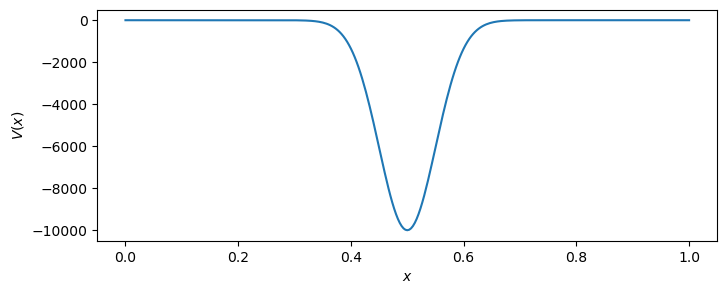

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
import numba
from numba import jit
from scipy.linalg import eigh_tridiagonal
#plt.style.use(['science', 'notebook', 'grid'])

#https://github.com/lukepolson/youtube_channel/blob/main/Python%20Metaphysics%20Series/vid17.ipynb

Nx = 301
Nt = 100000
dx = 1/(Nx-1)
dt=1e-7
x = np.linspace(0, 1, Nx)
psi0 = np.sqrt(2)*np.sin(np.pi*x)
mu, sigma = 1/2, 1/20
V = -1e4*np.exp(-(x-mu)**2/(2*sigma**2))

print(dt/dx**2)

plt.figure(figsize=(8,3))
plt.plot(x,V)
plt.xlabel('$x$')
plt.ylabel('$V(x)$')


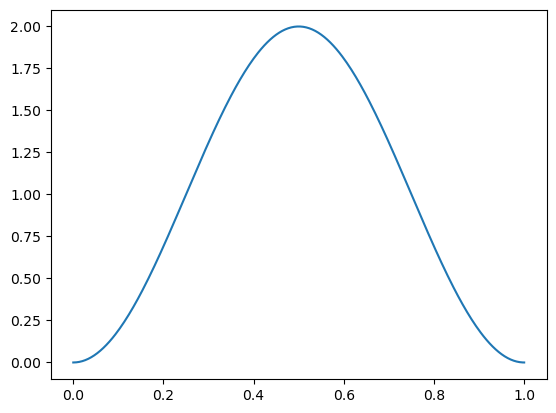

In [4]:
psi = np.zeros([Nt,Nx])
psi[0] = psi0

@numba.jit("c16[:,:](c16[:,:])", nopython=True, nogil=True)
def compute_psi(psi):
    for t in range(0, Nt-1):
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t][i] + 1j/2 * dt/dx**2 * (psi[t][i+1] - 2*psi[t][i] + psi[t][i-1]) - 1j*dt*V[i]*psi[t][i]
        
        normal = np.sum(np.absolute(psi[t+1])**2)*dx
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t+1][i]/normal
        
    return psi

psi_m1 = compute_psi(psi.astype(complex))

plt.plot(x, np.absolute(psi_m1[0])**2)

In [ ]:
import numpy as np
from scipy.integrate import complex_odeint

# Define the function to be integrated
def f(z):
    return np.exp(-z**2)

# Define the contour
def contour(t):
    return 2j * t

# Define the limits of integration
t_start = 0
t_stop = 1

# Define the initial value
z0 = 0

# Define the number of points in the contour
N = 100

# Define the points in the contour
t = np.linspace(t_start, t_stop, N)

# Solve the integral using complex_odeint
result = complex_odeint(f, z0, contour(t))

# Print the result
print(result[-1])